In [56]:
#import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#use ; sns.set() and sns.set_color_codes() to set the background
import seaborn as sns; sns.set()
sns.set_color_codes()
sns.set(rc={'figure.figsize':(10,10)})

#read the data files and set them to variables
city_data = pd.read_csv("raw_data/city_data.csv")
ride_data = pd.read_csv("raw_data/ride_data.csv")

#group the ride_data by city
ride_data_grouped = ride_data.groupby("city")

#merged the two data frames into one on "city"
merged_data_frames = pd.merge(ride_data, city_data, on="city")
merged_data_frames.head(2)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban


In [57]:
# find the total number of rides in each city by using value_counts() on the 'city' column in the merged data frame
ridesPerCity = merged_data_frames["city"].value_counts()
#turn this into a dataframe
ridesPerCity = pd.DataFrame(ridesPerCity)
#rename the 'city' column in the new data frame to something that makes more sense
ridesPerCity = ridesPerCity.rename(columns={"city":"Total Rides"})
ridesPerCity

#find the total fare for each city
#first, create a variable using merged_data_frames grouped by 'city'
groupedFare = merged_data_frames.groupby(by="city")
#then create a new variable using the last steps sum
farePerCity = groupedFare.sum()
#take onlt the 'fare' column
farePerCity = farePerCity["fare"]
#and convert back to a data frame
farePerCity = pd.DataFrame(farePerCity)
#rename the 'fare' column to 'Total Fare' so it is clear what is in the column
farePerCity = farePerCity.rename(columns={"fare":"Total Fare"})
#remove the index name
del farePerCity.index.name

#add total rides to the new dataframe by using merge on it and the ridesPerCity created earlier, merging based on the index
fareAndTotalRidesPerCity = pd.merge(ridesPerCity,farePerCity,left_index=True, right_index=True )
#find the average fare per city by diving 'Total Fare' by "Total Rides" and adding the values to a new column
fareAndTotalRidesPerCity["Average Fare"] = fareAndTotalRidesPerCity["Total Fare"]/fareAndTotalRidesPerCity["Total Rides"]
fareAndTotalRidesPerCity

#add the total drivers in a city to the data frame by using .sum() on the groupedFare groupby object
driversPerCity = groupedFare.sum()
#take only the "drivers_count" column
driversPerCity = driversPerCity["driver_count"]
#convert back to a data frame
driversPerCity = pd.DataFrame(driversPerCity)
#merge this data frame to the data frame containg fare and total rides by the index
ridesFareDrivers = pd.merge(fareAndTotalRidesPerCity,driversPerCity,left_index=True, right_index=True )

#add the city type to each city in the large data frame by setting a variable equal to the groupedFare groupby object.first(),
#to find the first string that appears for each city type
cityType = groupedFare.first()
#take only the 'type' column
cityType = cityType["type"]
#convert back to a data frame
cityType = pd.DataFrame(cityType)
#merge this data frame to the data frame containg fare, total rides and total drivers by the index
ridesFareDriversType = pd.merge(ridesFareDrivers,cityType,left_index=True, right_index=True )
ridesFareDriversType.head()

,Total Rides,Total Fare,Average Fare,driver_count,type
West Angela,39,1013.61,25.990000,1872,Urban
South Karenland,38,1008.35,26.535526,152,Urban
North Jason,35,796.03,22.743714,210,Urban
Liumouth,33,862.95,26.150000,2277,Urban
Port Frank,33,897.65,27.201515,759,Urban


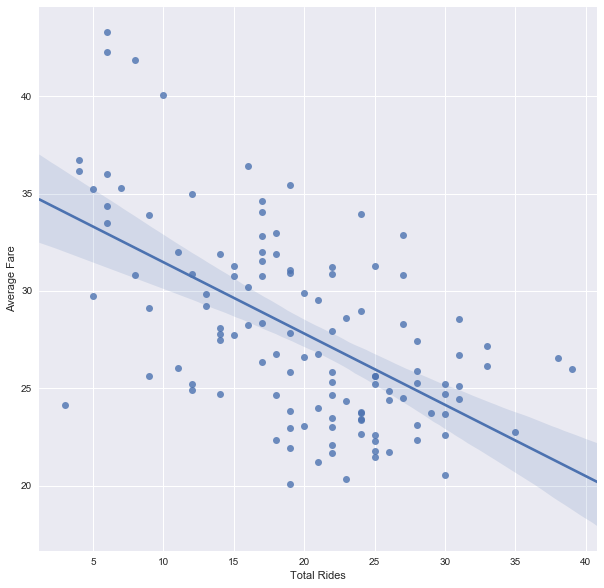

In [58]:
# colors = ('lightcoral', 'lightskyblue', 'gold')
# custom_palette = {}
# for q in ridesFareDriversType["type"]:
# #     avr = (np.average(scores[scores.Question == q].Score))
#     if ridesFareDriversType.type == "Urban":
#         custom_palette[q] = 'r'
#     elif avr < 2.5:
#         custom_palette[q] = 'y'
#     else:
#         custom_palette[q] = 'g'
colors=["r", "g", "b"]



fig, ax = plt.subplots()
sns.regplot(ridesFareDriversType["Total Rides"], ridesFareDriversType["Average Fare"], data=ridesFareDriversType, scatter=True)
#             color= ['b','r'])